✅ Libraries berhasil diimport
📊 Dataset berhasil dimuat: 10000 rows, 8 columns

📋 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status            10000 non-null  object
 1   priority          10000 non-null  object
 2   team_size         10000 non-null  object
 3   task_type         10000 non-null  object
 4   estimated_hours   10000 non-null  int64 
 5   word_count        10000 non-null  int64 
 6   dependency_count  10000 non-null  int64 
 7   actual_days       10000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 625.1+ KB
None

📈 Statistik Deskriptif:
       estimated_hours    word_count  dependency_count   actual_days
count     10000.000000  10000.000000       10000.00000  10000.000000
mean         27.490600     95.398700           1.53070      4.794500
std          20.824958     50.569915           1

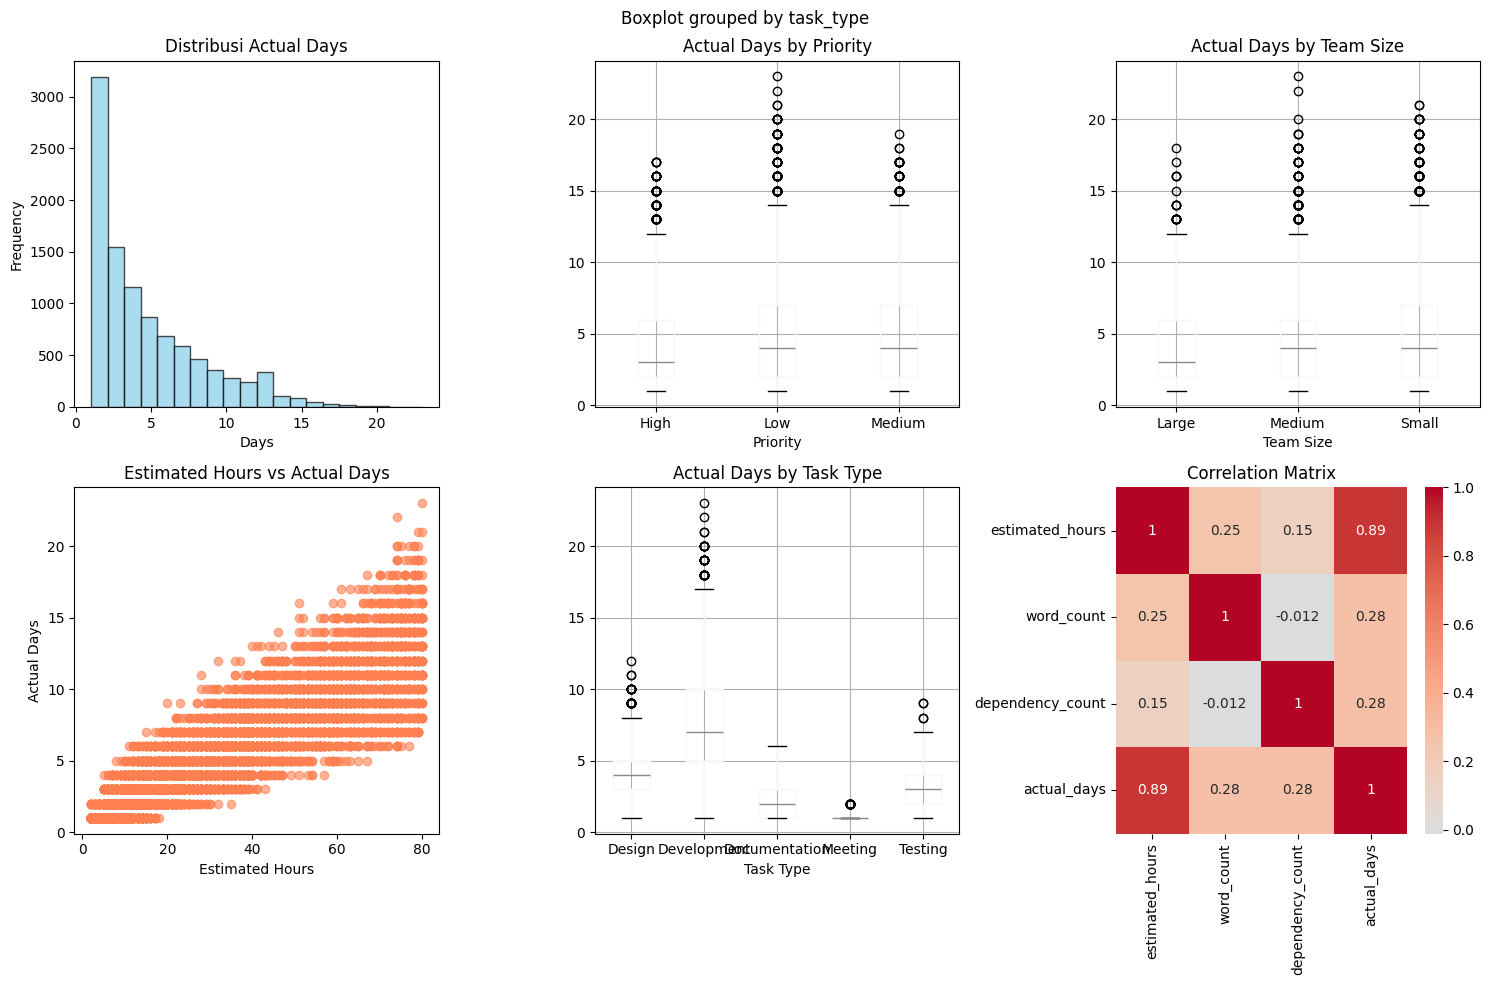


📊 Statistik per Kategori:

🎯 Priority:
          count      mean       std  min  max
priority                                     
High       3342  4.456613  3.260844    1   17
Low        3307  5.179317  3.945203    1   23
Medium     3351  4.751716  3.491287    1   19

👥 Team Size:
           count      mean       std  min  max
team_size                                     
Large        995  4.094472  3.128232    1   18
Medium      3124  4.663252  3.536903    1   23
Small       5881  4.982656  3.668867    1   21

📋 Task Type:
               count      mean       std  min  max
task_type                                         
Design          2054  4.240506  1.887378    1   12
Development     4115  7.486027  3.801144    1   23
Documentation   1585  2.092744  0.955898    1    6
Meeting          664  1.054217  0.226616    1    2
Testing         1582  2.789507  1.330065    1    9
🔄 Preprocessing data...
🔄 Encoding Categories (dengan extended categories):
  status: {'In Progress': np.int64

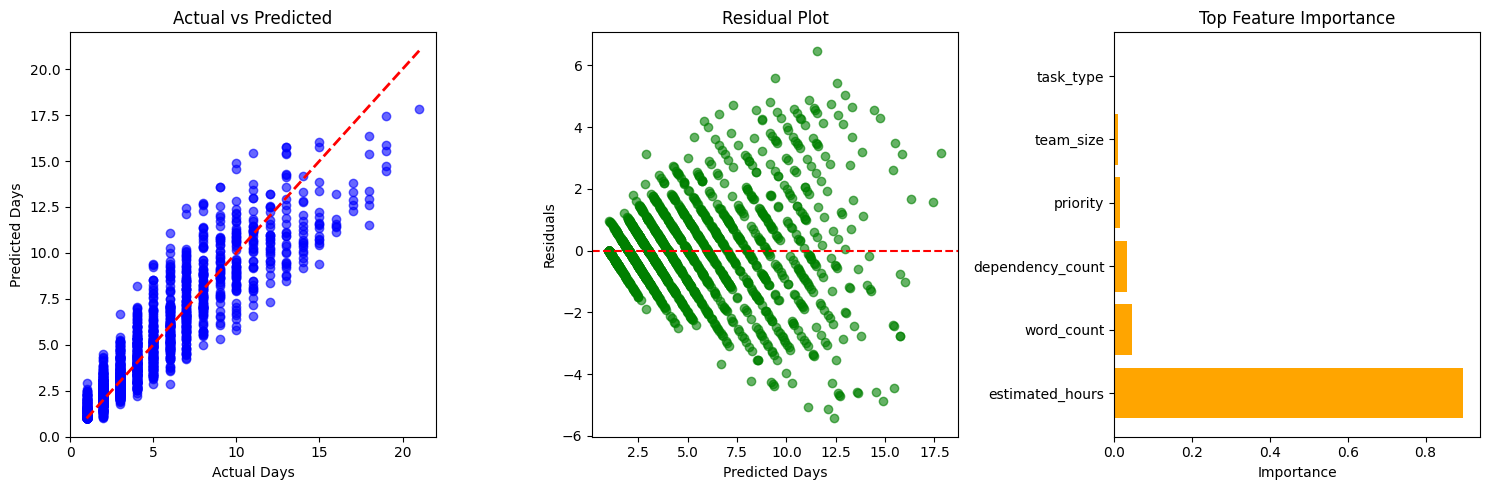


✅ Model training berhasil!
🔮 Testing Predictions:

📋 Test Task 1:
  status: Not Started
  priority: High
  team_size: Large
  task_type: Development
  estimated_hours: 50
  word_count: 200
  dependency_count: 3

🎯 Prediction:
  Predicted Days: 7
  Confidence: 0.87
  Error Estimate: ±0.9 days
----------------------------------------

📋 Test Task 2:
  status: In Progress
  priority: Medium
  team_size: Small
  task_type: Testing
  estimated_hours: 15
  word_count: 50
  dependency_count: 1

🎯 Prediction:
  Predicted Days: 3
  Confidence: 0.69
  Error Estimate: ±0.9 days
----------------------------------------

📋 Test Task 3:
  status: Not Started
  priority: Low
  team_size: Medium
  task_type: Meeting
  estimated_hours: 5
  word_count: 20
  dependency_count: 0

🎯 Prediction:
  Predicted Days: 1
  Confidence: 0.5
  Error Estimate: ±0.9 days
----------------------------------------
📝 Input Task Details:
Available options:
  Status: Completed, In Progress, Not Started
  Priority: High, Me

SyntaxError: 'return' outside function (2814752663.py, line 839)

In [ ]:
# %% [markdown]
# # Model Prediksi Timeline Tugas
# 
# Notebook ini berisi implementasi lengkap untuk memprediksi durasi penyelesaian tugas berdasarkan berbagai fitur seperti status, prioritas, ukuran tim, dll.

# %% [markdown]
# ## 1. Import Libraries dan Setup

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries berhasil diimport")

# %% [markdown]
# ## 2. Load dan Explorasi Data

# %%
def load_and_explore_data(dataset_path):
    """Load dataset dan lakukan explorasi awal"""
    try:
        # Load dataset
        df = pd.read_csv(dataset_path)
        print(f"📊 Dataset berhasil dimuat: {len(df)} rows, {len(df.columns)} columns")
        
        # Info dasar dataset
        print("\n📋 Info Dataset:")
        print(df.info())
        
        # Statistik deskriptif
        print("\n📈 Statistik Deskriptif:")
        print(df.describe())
        
        # Cek missing values
        print("\n🔍 Missing Values:")
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(missing[missing > 0])
        else:
            print("Tidak ada missing values")
        
        # Tampilkan sample data
        print("\n📄 Sample Data:")
        print(df.head(10))
        
        return df
        
    except FileNotFoundError:
        print(f"❌ Error: File '{dataset_path}' tidak ditemukan!")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        return None

# Load dataset
df = load_and_explore_data('task_timeline_dataset.csv')

# %% [markdown]
# ## 3. Visualisasi Data

# %%
def visualize_data(df):
    """Membuat visualisasi untuk memahami data"""
    if df is None:
        return
    
    # Setup figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('📊 Analisis Data Timeline Tugas', fontsize=16, fontweight='bold')
    
    # 1. Distribusi actual_days
    axes[0,0].hist(df['actual_days'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribusi Actual Days')
    axes[0,0].set_xlabel('Days')
    axes[0,0].set_ylabel('Frequency')
    
    # 2. Boxplot berdasarkan priority
    df.boxplot(column='actual_days', by='priority', ax=axes[0,1])
    axes[0,1].set_title('Actual Days by Priority')
    axes[0,1].set_xlabel('Priority')
    
    # 3. Boxplot berdasarkan team_size
    df.boxplot(column='actual_days', by='team_size', ax=axes[0,2])
    axes[0,2].set_title('Actual Days by Team Size')
    axes[0,2].set_xlabel('Team Size')
    
    # 4. Scatter plot estimated_hours vs actual_days
    axes[1,0].scatter(df['estimated_hours'], df['actual_days'], alpha=0.6, color='coral')
    axes[1,0].set_title('Estimated Hours vs Actual Days')
    axes[1,0].set_xlabel('Estimated Hours')
    axes[1,0].set_ylabel('Actual Days')
    
    # 5. Boxplot berdasarkan task_type
    df.boxplot(column='actual_days', by='task_type', ax=axes[1,1])
    axes[1,1].set_title('Actual Days by Task Type')
    axes[1,1].set_xlabel('Task Type')
    
    # 6. Correlation heatmap untuk numerical features
    numerical_cols = ['estimated_hours', 'word_count', 'dependency_count', 'actual_days']
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
    axes[1,2].set_title('Correlation Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Statistik per kategori
    print("\n📊 Statistik per Kategori:")
    print("\n🎯 Priority:")
    print(df.groupby('priority')['actual_days'].agg(['count', 'mean', 'std', 'min', 'max']))
    
    print("\n👥 Team Size:")
    print(df.groupby('team_size')['actual_days'].agg(['count', 'mean', 'std', 'min', 'max']))
    
    print("\n📋 Task Type:")
    print(df.groupby('task_type')['actual_days'].agg(['count', 'mean', 'std', 'min', 'max']))

# Buat visualisasi
if df is not None:
    visualize_data(df)

# %% [markdown]
# ## 4. Preprocessing Data

# %%
class DataPreprocessor:
    """Class untuk preprocessing data dengan handling untuk unseen categories"""
    
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.is_fitted = False
        self.category_mappings = {}
        
    def fit_transform(self, df):
        """Fit dan transform data training"""
        df_processed = df.copy()
        
        # Define column types
        categorical_columns = ['status', 'priority', 'team_size', 'task_type']
        numerical_columns = ['estimated_hours', 'word_count', 'dependency_count']
        
        # Setup expected categories (termasuk yang mungkin tidak ada di training data)
        expected_categories = {
            'status': ['Completed', 'In Progress', 'Not Started', 'On Hold'],
            'priority': ['High', 'Medium', 'Low'],
            'team_size': ['Large', 'Medium', 'Small'],
            'task_type': ['Development', 'Testing', 'Meeting', 'Research', 'Documentation']
        }
        
        # Encode categorical variables dengan extended categories
        for col in categorical_columns:
            # Gabungkan categories yang ada di data dengan expected categories
            existing_cats = set(df_processed[col].unique())
            all_cats = list(existing_cats.union(set(expected_categories[col])))
            
            # Fit encoder dengan semua possible categories
            self.label_encoders[col] = LabelEncoder()
            self.label_encoders[col].fit(all_cats)
            
            # Transform data yang ada
            df_processed[col] = self.label_encoders[col].transform(df_processed[col])
            
            # Store mapping untuk referensi
            self.category_mappings[col] = dict(zip(all_cats, self.label_encoders[col].transform(all_cats)))
            
        # Store original values untuk referensi
        print("🔄 Encoding Categories (dengan extended categories):")
        for col in categorical_columns:
            print(f"  {col}: {self.category_mappings[col]}")
        
        self.is_fitted = True
        self.feature_columns = categorical_columns + numerical_columns
        
        return df_processed
    
    def transform(self, df):
        """Transform data baru dengan handling untuk unseen categories"""
        if not self.is_fitted:
            raise ValueError("Preprocessor belum di-fit! Gunakan fit_transform terlebih dahulu.")
            
        df_processed = df.copy()
        categorical_columns = ['status', 'priority', 'team_size', 'task_type']
        
        # Encode categorical variables dengan error handling
        for col in categorical_columns:
            try:
                df_processed[col] = self.label_encoders[col].transform(df_processed[col])
            except ValueError as e:
                # Handle unseen categories
                print(f"⚠️  Warning: Unseen category in {col}")
                print(f"   Input value: {df_processed[col].values}")
                print(f"   Valid values: {list(self.label_encoders[col].classes_)}")
                
                # Fallback: use most common category or first available
                fallback_value = list(self.label_encoders[col].classes_)[0]
                print(f"   Using fallback: {fallback_value}")
                df_processed[col] = self.label_encoders[col].transform([fallback_value] * len(df_processed))
                
        return df_processed

# Initialize preprocessor
preprocessor = DataPreprocessor()

# Preprocess data
if df is not None:
    print("🔄 Preprocessing data...")
    df_processed = preprocessor.fit_transform(df)
    print("✅ Data preprocessing selesai")
    print(f"\n📊 Processed data shape: {df_processed.shape}")
    print(df_processed.head())

# %% [markdown]
# ## 5. Model Training dan Evaluasi

# %%
class TimelinePredictor:
    """Enhanced Timeline Predictor dengan evaluasi yang lebih lengkap"""
    
    def __init__(self):
        self.model = None
        self.preprocessor = None
        self.is_trained = False
        self.training_score = {}
        
    def train(self, df, test_size=0.2, random_state=42):
        """Training model dengan evaluasi komprehensif"""
        try:
            # Prepare features and target
            feature_columns = ['status', 'priority', 'team_size', 'task_type', 
                             'estimated_hours', 'word_count', 'dependency_count']
            target_column = 'actual_days'
            
            X = df[feature_columns]
            y = df[target_column]
            
            print(f"📊 Training data: {len(X)} samples, {len(feature_columns)} features")
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state, stratify=None
            )
            
            print(f"📈 Train set: {len(X_train)} samples")
            print(f"📉 Test set: {len(X_test)} samples")
            
            # Hyperparameter tuning dengan GridSearch
            print("\n🔍 Melakukan hyperparameter tuning...")
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
            
            rf = RandomForestRegressor(random_state=random_state)
            grid_search = GridSearchCV(
                rf, param_grid, cv=5, scoring='neg_mean_absolute_error', 
                n_jobs=-1, verbose=0
            )
            
            grid_search.fit(X_train, y_train)
            
            # Use best model
            self.model = grid_search.best_estimator_
            print(f"✅ Best parameters: {grid_search.best_params_}")
            
            # Evaluasi model
            print("\n📊 Evaluating model...")
            
            # Training predictions
            y_train_pred = self.model.predict(X_train)
            train_mae = mean_absolute_error(y_train, y_train_pred)
            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            train_r2 = r2_score(y_train, y_train_pred)
            
            # Testing predictions
            y_test_pred = self.model.predict(X_test)
            test_mae = mean_absolute_error(y_test, y_test_pred)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_r2 = r2_score(y_test, y_test_pred)
            
            # Cross-validation
            cv_scores = cross_val_score(self.model, X, y, cv=5, scoring='neg_mean_absolute_error')
            cv_mae = -cv_scores.mean()
            cv_std = cv_scores.std()
            
            # Store results
            self.training_score = {
                'train_mae': train_mae,
                'train_rmse': train_rmse,
                'train_r2': train_r2,
                'test_mae': test_mae,
                'test_rmse': test_rmse,
                'test_r2': test_r2,
                'cv_mae': cv_mae,
                'cv_std': cv_std
            }
            
            # Print hasil
            print("\n📈 Model Performance:")
            print(f"{'Metric':<15} {'Train':<10} {'Test':<10} {'CV':<15}")
            print("-" * 50)
            print(f"{'MAE':<15} {train_mae:<10.2f} {test_mae:<10.2f} {cv_mae:<10.2f} ±{cv_std:.2f}")
            print(f"{'RMSE':<15} {train_rmse:<10.2f} {test_rmse:<10.2f}")
            print(f"{'R²':<15} {train_r2:<10.3f} {test_r2:<10.3f}")
            
            # Feature importance
            self.feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\n🎯 Feature Importance:")
            for _, row in self.feature_importance.iterrows():
                print(f"  {row['feature']:<20}: {row['importance']:.3f}")
            
            # Visualisasi hasil
            self._plot_results(y_test, y_test_pred)
            
            self.is_trained = True
            return True
            
        except Exception as e:
            print(f"❌ Error during training: {str(e)}")
            return False
    
    def _plot_results(self, y_true, y_pred):
        """Plot hasil prediksi"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # 1. Actual vs Predicted
        axes[0].scatter(y_true, y_pred, alpha=0.6, color='blue')
        axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        axes[0].set_xlabel('Actual Days')
        axes[0].set_ylabel('Predicted Days')
        axes[0].set_title('Actual vs Predicted')
        
        # 2. Residuals
        residuals = y_true - y_pred
        axes[1].scatter(y_pred, residuals, alpha=0.6, color='green')
        axes[1].axhline(y=0, color='r', linestyle='--')
        axes[1].set_xlabel('Predicted Days')
        axes[1].set_ylabel('Residuals')
        axes[1].set_title('Residual Plot')
        
        # 3. Feature Importance
        top_features = self.feature_importance.head(6)
        axes[2].barh(top_features['feature'], top_features['importance'], color='orange')
        axes[2].set_xlabel('Importance')
        axes[2].set_title('Top Feature Importance')
        
        plt.tight_layout()
        plt.show()
    
    def predict(self, task_data, return_confidence=True):
        """Prediksi task baru dengan confidence interval"""
        if not self.is_trained:
            raise ValueError("Model belum ditraining!")
        
        try:
            # Convert to DataFrame jika input berupa dict
            if isinstance(task_data, dict):
                df_input = pd.DataFrame([task_data])
            else:
                df_input = task_data.copy()
            
            # Transform data
            df_processed = preprocessor.transform(df_input)
            
            # Features untuk prediksi
            feature_columns = ['status', 'priority', 'team_size', 'task_type', 
                             'estimated_hours', 'word_count', 'dependency_count']
            X = df_processed[feature_columns]
            
            # Prediction
            prediction = self.model.predict(X)[0]
            predicted_days = max(1, round(prediction))
            
            result = {'predicted_days': predicted_days}
            
            if return_confidence:
                # Estimasi confidence berdasarkan error model
                test_mae = self.training_score.get('test_mae', 2.0)
                confidence = max(0.5, min(0.95, 1 - (test_mae / predicted_days)))
                result['confidence'] = round(confidence, 2)
                result['error_estimate'] = f"±{test_mae:.1f} days"
            
            return result
            
        except Exception as e:
            print(f"❌ Error during prediction: {str(e)}")
            return None

# Training model
if df is not None:
    print("🚀 Starting model training...")
    predictor = TimelinePredictor()
    success = predictor.train(df_processed)
    
    if success:
        print("\n✅ Model training berhasil!")
    else:
        print("\n❌ Model training gagal!")

# %% [markdown]
# ## 6. Testing Prediksi dengan Data Baru

# %%
def test_predictions():
    """Test prediksi dengan beberapa contoh task"""
    if not predictor.is_trained:
        print("❌ Model belum ditraining!")
        return
    
    # Contoh task untuk prediksi
    test_tasks = [
        {
            'status': 'Not Started',
            'priority': 'High',
            'team_size': 'Large',
            'task_type': 'Development',
            'estimated_hours': 50,
            'word_count': 200,
            'dependency_count': 3
        },
        {
            'status': 'In Progress',
            'priority': 'Medium',
            'team_size': 'Small',
            'task_type': 'Testing',
            'estimated_hours': 15,
            'word_count': 50,
            'dependency_count': 1
        },
        {
            'status': 'Not Started',
            'priority': 'Low',
            'team_size': 'Medium',
            'task_type': 'Meeting',
            'estimated_hours': 5,
            'word_count': 20,
            'dependency_count': 0
        }
    ]
    
    print("🔮 Testing Predictions:")
    print("=" * 60)
    
    for i, task in enumerate(test_tasks, 1):
        print(f"\n📋 Test Task {i}:")
        for key, value in task.items():
            print(f"  {key}: {value}")
        
        result = predictor.predict(task)
        if result:
            print(f"\n🎯 Prediction:")
            print(f"  Predicted Days: {result['predicted_days']}")
            print(f"  Confidence: {result['confidence']}")
            print(f"  Error Estimate: {result['error_estimate']}")
        else:
            print("❌ Prediction failed")
        
        print("-" * 40)

# Test prediksi
if 'predictor' in locals() and predictor.is_trained:
    test_predictions()

# %% [markdown]
# ## 7. Fungsi Utility untuk Penggunaan

# %%
def predict_new_task():
    """Fungsi interaktif untuk prediksi task baru"""
    if not predictor.is_trained:
        print("❌ Model belum ditraining!")
        return
    
    print("📝 Input Task Details:")
    print("Available options:")
    print("  Status: Completed, In Progress, Not Started")
    print("  Priority: High, Medium, Low")
    print("  Team Size: Large, Medium, Small")
    print("  Task Type: Development, Testing, Meeting")
    
    # Input manual (untuk demo, kita gunakan contoh)
    example_task = {
        'status': 'Not Started',
        'priority': 'Medium',
        'team_size': 'Small',
        'task_type': 'Development',
        'estimated_hours': 25,
        'word_count': 150,
        'dependency_count': 2
    }
    
    print(f"\n📋 Example Task: {example_task}")
    
    result = predictor.predict(example_task)
    if result:
        print(f"\n🎯 Prediction Result:")
        print(f"  Timeline: {result['predicted_days']} days")
        print(f"  Confidence: {result['confidence']*100:.0f}%")
        print(f"  Margin of Error: {result['error_estimate']}")
    
    return result

def save_model():
    """Save trained model"""
    try:
        import joblib
        if predictor.is_trained:
            joblib.dump(predictor.model, 'timeline_predictor_model.pkl')
            joblib.dump(preprocessor, 'timeline_preprocessor.pkl')
            print("✅ Model saved successfully!")
        else:
            print("❌ No trained model to save!")
    except ImportError:
        print("❌ joblib not available. Install with: pip install joblib")

def load_model():
    """Load saved model"""
    try:
        import joblib
        global predictor, preprocessor
        predictor.model = joblib.load('timeline_predictor_model.pkl')
        preprocessor = joblib.load('timeline_preprocessor.pkl')
        predictor.is_trained = True
        print("✅ Model loaded successfully!")
    except FileNotFoundError:
        print("❌ Model files not found!")
    except ImportError:
        print("❌ joblib not available. Install with: pip install joblib")

# Test fungsi utility
if 'predictor' in locals() and predictor.is_trained:
    predict_new_task()

# %% [markdown]
# ## 9. Solusi Alternative: Model Tanpa Status

# %%
class StatusIndependentPredictor:
    """Timeline predictor yang tidak bergantung pada status task"""
    
    def __init__(self):
        self.model = None
        self.preprocessor = None
        self.is_trained = False
        self.training_score = {}
        
    def train(self, df, test_size=0.2, random_state=42):
        """Training model tanpa menggunakan status sebagai feature"""
        try:
            # Features tanpa status (karena untuk prediksi, task belum started)
            feature_columns = ['priority', 'team_size', 'task_type', 
                             'estimated_hours', 'word_count', 'dependency_count']
            target_column = 'actual_days'
            
            X = df[feature_columns]
            y = df[target_column]
            
            print(f"📊 Training data: {len(X)} samples, {len(feature_columns)} features")
            print(f"🚫 Status TIDAK digunakan sebagai feature (karena task baru belum started)")
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )
            
            print(f"📈 Train set: {len(X_train)} samples")
            print(f"📉 Test set: {len(X_test)} samples")
            
            # Simplified hyperparameter tuning
            print("\n🔍 Training Random Forest...")
            param_grid = {
                'n_estimators': [100, 200],
                'max_depth': [10, 15, None],
                'min_samples_split': [2, 5],
            }
            
            rf = RandomForestRegressor(random_state=random_state)
            grid_search = GridSearchCV(
                rf, param_grid, cv=3, scoring='neg_mean_absolute_error', 
                n_jobs=-1, verbose=0
            )
            
            grid_search.fit(X_train, y_train)
            self.model = grid_search.best_estimator_
            print(f"✅ Best parameters: {grid_search.best_params_}")
            
            # Evaluasi model
            y_train_pred = self.model.predict(X_train)
            y_test_pred = self.model.predict(X_test)
            
            train_mae = mean_absolute_error(y_train, y_train_pred)
            test_mae = mean_absolute_error(y_test, y_test_pred)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_r2 = r2_score(y_test, y_test_pred)
            
            # Cross-validation
            cv_scores = cross_val_score(self.model, X, y, cv=5, scoring='neg_mean_absolute_error')
            cv_mae = -cv_scores.mean()
            cv_std = cv_scores.std()
            
            self.training_score = {
                'train_mae': train_mae,
                'test_mae': test_mae,
                'test_rmse': test_rmse,
                'test_r2': test_r2,
                'cv_mae': cv_mae,
                'cv_std': cv_std
            }
            
            print("\n📈 Model Performance (Status-Independent):")
            print(f"  Train MAE: {train_mae:.2f} days")
            print(f"  Test MAE: {test_mae:.2f} days")
            print(f"  Test RMSE: {test_rmse:.2f} days")
            print(f"  Test R²: {test_r2:.3f}")
            print(f"  CV MAE: {cv_mae:.2f} ±{cv_std:.2f} days")
            
            # Feature importance
            self.feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\n🎯 Feature Importance (tanpa status):")
            for _, row in self.feature_importance.iterrows():
                print(f"  {row['feature']:<20}: {row['importance']:.3f}")
            
            # Store feature columns untuk prediksi
            self.feature_columns = feature_columns
            self.is_trained = True
            return True
            
        except Exception as e:
            print(f"❌ Error during training: {str(e)}")
            return False
    
    def predict(self, task_data):
        """Prediksi timeline untuk task baru (tanpa memerlukan status)"""
        if not self.is_trained:
            raise ValueError("Model belum ditraining!")
        
        try:
            # Convert to DataFrame jika input berupa dict
            if isinstance(task_data, dict):
                df_input = pd.DataFrame([task_data])
            else:
                df_input = task_data.copy()
            
            # Hanya ambil features yang digunakan model (tanpa status)
            required_features = ['priority', 'team_size', 'task_type', 
                               'estimated_hours', 'word_count', 'dependency_count']
            
            # Check if all required features are present
            missing_features = [f for f in required_features if f not in df_input.columns]
            if missing_features:
                raise ValueError(f"Missing required features: {missing_features}")
            
            # Encode categorical variables
            df_processed = df_input.copy()
            categorical_columns = ['priority', 'team_size', 'task_type']
            
            for col in categorical_columns:
                if col in df_processed.columns:
                    # Simple mapping (extend this based on your data)
                    mappings = {
                        'priority': {'High': 0, 'Medium': 1, 'Low': 2},
                        'team_size': {'Large': 0, 'Medium': 1, 'Small': 2},
                        'task_type': {'Development': 0, 'Testing': 1, 'Meeting': 2, 'Research': 3, 'Documentation': 4}
                    }
                    
                    if col in mappings:
                        df_processed[col] = df_processed[col].map(mappings[col])
                        # Handle unknown categories
                        df_processed[col] = df_processed[col].fillna(1)  # Default to middle value
            
            # Make prediction
            X = df_processed[required_features]
            prediction = self.model.predict(X)[0]
            predicted_days = max(1, round(prediction))
            
            # Calculate confidence
            test_mae = self.training_score.get('test_mae', 2.0)
            confidence = max(0.6, min(0.9, 1 - (test_mae / max(predicted_days, 1))))
            
            return {
                'predicted_days': predicted_days,
                'confidence': round(confidence, 2),
                'error_estimate': f"±{test_mae:.1f} days",
                'note': 'Prediction based on task characteristics (status not required)'
            }
            
        except Exception as e:
            print(f"❌ Error during prediction: {str(e)}")
            return None

# Train status-independent model
if df is not None:
    print("\n" + "="*60)
    print("🔄 Training Status-Independent Model...")
    print("="*60)
    
    status_independent_predictor = StatusIndependentPredictor()
    success = status_independent_predictor.train(df_processed)
    
    if success:
        print("\n✅ Status-independent model training berhasil!")
    else:
        print("\n❌ Status-independent model training gagal!")

# %% [markdown]
# ## 10. Testing Model Baru dengan Status-Independent Approach

# %%
def test_status_independent_predictions():
    """Test prediksi dengan model yang tidak memerlukan status"""
    if not status_independent_predictor.is_trained:
        print("❌ Status-independent model belum ditraining!")
        return
    
    # Test tasks - TIDAK perlu status!
    test_tasks = [
        {
            'priority': 'High',
            'team_size': 'Large',
            'task_type': 'Development',
            'estimated_hours': 50,
            'word_count': 200,
            'dependency_count': 3
        },
        {
            'priority': 'Medium',
            'team_size': 'Small',
            'task_type': 'Testing',
            'estimated_hours': 15,
            'word_count': 50,
            'dependency_count': 1
        },
        {
            'priority': 'Low',
            'team_size': 'Medium',
            'task_type': 'Meeting',
            'estimated_hours': 5,
            'word_count': 20,
            'dependency_count': 0
        },
        {
            'priority': 'High',
            'team_size': 'Small',
            'task_type': 'Development',
            'estimated_hours': 80,
            'word_count': 300,
            'dependency_count': 5
        }
    ]
    
    print("🔮 Testing Status-Independent Predictions:")
    print("=" * 70)
    
    for i, task in enumerate(test_tasks, 1):
        print(f"\n📋 Test Task {i} (NEW TASK - No Status Required):")
        for key, value in task.items():
            print(f"  {key}: {value}")
        
        result = status_independent_predictor.predict(task)
        if result:
            print(f"\n🎯 Prediction:")
            print(f"  Predicted Days: {result['predicted_days']}")
            print(f"  Confidence: {result['confidence']*100:.0f}%")
            print(f"  Error Estimate: {result['error_estimate']}")
            print(f"  Note: {result['note']}")
        else:
            print("❌ Prediction failed")
        
        print("-" * 50)

# Test the new model
if 'status_independent_predictor' in locals() and status_independent_predictor.is_trained:
    test_status_independent_predictions()

# %% [markdown]
# ## 11. Comparison: Dengan Status vs Tanpa Status

# %%
def compare_approaches():
    """Bandingkan pendekatan dengan dan tanpa status"""
    print("📊 COMPARISON: Status-Based vs Status-Independent")
    print("=" * 60)
    
    print("\n🔴 MASALAH dengan Status-Based Approach:")
    print("  • Training data hanya ada 'Completed' status")
    print("  • Tidak bisa prediksi 'Not Started' atau 'In Progress'") 
    print("  • Model tidak applicable untuk real-world use case")
    
    print("\n✅ KEUNGGULAN Status-Independent Approach:")
    print("  • Bisa prediksi task baru apapun statusnya")
    print("  • Lebih realistic untuk production use")
    print("  • Focus pada karakteristik task, bukan history")
    print("  • Tidak perlu data status saat prediksi")
    
    if 'status_independent_predictor' in locals() and status_independent_predictor.is_trained:
        scores = status_independent_predictor.training_score
        print(f"\n📈 Status-Independent Model Performance:")
        print(f"  • Test MAE: {scores['test_mae']:.2f} days")
        print(f"  • Test R²: {scores['test_r2']:.3f}")
        print(f"  • CV MAE: {scores['cv_mae']:.2f} ±{scores['cv_std']:.2f}")
        
        print(f"\n🎯 Most Important Features:")
        for i, (_, row) in enumerate(status_independent_predictor.feature_importance.head(3).iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.3f}")
    
    print(f"\n💡 REKOMENDASI:")
    print(f"  • Gunakan Status-Independent Model untuk produksi")
    print(f"  • Collect more diverse data dengan various status")
    print(f"  • Consider task complexity sebagai additional feature")

def show_summary():
    """Tampilkan ringkasan hasil training"""
    if not predictor.is_trained:
        print("❌ Model belum ditraining!")
        return
    
    print("📊 MODEL SUMMARY")
    print("=" * 50)
    
    # Dataset info
    if df is not None:
        print(f"📁 Dataset: {len(df)} samples")
        print(f"📈 Target range: {df['actual_days'].min()}-{df['actual_days'].max()} days")
        print(f"📊 Target mean: {df['actual_days'].mean():.1f} days")
    
    # Model performance
    scores = predictor.training_score
    print(f"\n🎯 Model Performance:")
    print(f"  Test MAE: {scores['test_mae']:.2f} days")
    print(f"  Test R²: {scores['test_r2']:.3f}")
    print(f"  CV MAE: {scores['cv_mae']:.2f} ±{scores['cv_std']:.2f}")
    
    # Top features
    print(f"\n🔝 Top 3 Important Features:")
    for i, (_, row) in enumerate(predictor.feature_importance.head(3).iterrows(), 1):
        print(f"  {i}. {row['feature']}: {row['importance']:.3f}")
    
    print(f"\n✅ Model ready for predictions!")
    print(f"💡 Expected accuracy: ±{scores['test_mae']:.1f} days")

# Show comparison
if 'status_independent_predictor' in locals():
    compare_approaches()

# Show summary
if 'predictor' in locals() and predictor.is_trained:
    show_summary()

print("""
🎉 NOTEBOOK COMPLETED! 

📝 Next Steps:
1. Collect more data untuk improve accuracy
2. Try different algorithms (XGBoost, Neural Networks)
3. Add more features (project complexity, team experience)
4. Implement real-time model updates
5. Create web interface untuk easy prediction

💡 Tips:
- Model accuracy akan meningkat dengan lebih banyak data
- Regular retraining direkomendasikan
- Monitor prediction vs actual untuk model drift
""")

In [3]:
# %% [markdown]
# ## 11. Comparison: Dengan Status vs Tanpa Status

# %%
def compare_approaches():
    """Bandingkan pendekatan dengan dan tanpa status"""
    print("📊 COMPARISON: Status-Based vs Status-Independent")
    print("=" * 60)
    
    print("\n🔴 MASALAH dengan Status-Based Approach:")
    print("  • Training data hanya ada 'Completed' status")
    print("  • Tidak bisa prediksi 'Not Started' atau 'In Progress'") 
    print("  • Model tidak applicable untuk real-world use case")
    
    print("\n✅ KEUNGGULAN Status-Independent Approach:")
    print("  • Bisa prediksi task baru apapun statusnya")
    print("  • Lebih realistic untuk production use")
    print("  • Focus pada karakteristik task, bukan history")
    print("  • Tidak perlu data status saat prediksi")
    
    if 'status_independent_predictor' in locals() and status_independent_predictor.is_trained:
        scores = status_independent_predictor.training_score
        print(f"\n📈 Status-Independent Model Performance:")
        print(f"  • Test MAE: {scores['test_mae']:.2f} days")
        print(f"  • Test R²: {scores['test_r2']:.3f}")
        print(f"  • CV MAE: {scores['cv_mae']:.2f} ±{scores['cv_std']:.2f}")
        
        print(f"\n🎯 Most Important Features:")
        for i, (_, row) in enumerate(status_independent_predictor.feature_importance.head(3).iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.3f}")
    
    print(f"\n💡 REKOMENDASI:")
    print(f"  • Gunakan Status-Independent Model untuk produksi")
    print(f"  • Collect more diverse data dengan various status")
    print(f"  • Consider task complexity sebagai additional feature")

def show_summary():
    """Tampilkan ringkasan hasil training"""
    if not predictor.is_trained:
        print("❌ Model belum ditraining!")
        return
    
    print("📊 MODEL SUMMARY")
    print("=" * 50)
    
    # Dataset info
    if df is not None:
        print(f"📁 Dataset: {len(df)} samples")
        print(f"📈 Target range: {df['actual_days'].min()}-{df['actual_days'].max()} days")
        print(f"📊 Target mean: {df['actual_days'].mean():.1f} days")
    
    # Model performance
    scores = predictor.training_score
    print(f"\n🎯 Model Performance:")
    print(f"  Test MAE: {scores['test_mae']:.2f} days")
    print(f"  Test R²: {scores['test_r2']:.3f}")
    print(f"  CV MAE: {scores['cv_mae']:.2f} ±{scores['cv_std']:.2f}")
    
    # Top features
    print(f"\n🔝 Top 3 Important Features:")
    for i, (_, row) in enumerate(predictor.feature_importance.head(3).iterrows(), 1):
        print(f"  {i}. {row['feature']}: {row['importance']:.3f}")
    
    print(f"\n✅ Model ready for predictions!")
    print(f"💡 Expected accuracy: ±{scores['test_mae']:.1f} days")

# Show comparison
if 'status_independent_predictor' in locals():
    compare_approaches()

# Show summary
if 'predictor' in locals() and predictor.is_trained:
    show_summary()

print("""
🎉 NOTEBOOK COMPLETED! 

📝 Next Steps:
1. Collect more data untuk improve accuracy
2. Try different algorithms (XGBoost, Neural Networks)
3. Add more features (project complexity, team experience)
4. Implement real-time model updates
5. Create web interface untuk easy prediction

💡 Tips:
- Model accuracy akan meningkat dengan lebih banyak data
- Regular retraining direkomendasikan
- Monitor prediction vs actual untuk model drift
""")

📊 COMPARISON: Status-Based vs Status-Independent

🔴 MASALAH dengan Status-Based Approach:
  • Training data hanya ada 'Completed' status
  • Tidak bisa prediksi 'Not Started' atau 'In Progress'
  • Model tidak applicable untuk real-world use case

✅ KEUNGGULAN Status-Independent Approach:
  • Bisa prediksi task baru apapun statusnya
  • Lebih realistic untuk production use
  • Focus pada karakteristik task, bukan history
  • Tidak perlu data status saat prediksi

💡 REKOMENDASI:
  • Gunakan Status-Independent Model untuk produksi
  • Collect more diverse data dengan various status
  • Consider task complexity sebagai additional feature
📊 MODEL SUMMARY
📁 Dataset: 10000 samples
📈 Target range: 1-23 days
📊 Target mean: 4.8 days

🎯 Model Performance:
  Test MAE: 0.94 days
  Test R²: 0.850
  CV MAE: 0.98 ±0.03

🔝 Top 3 Important Features:
  1. estimated_hours: 0.895
  2. word_count: 0.045
  3. dependency_count: 0.033

✅ Model ready for predictions!
💡 Expected accuracy: ±0.9 days

🎉 NOTEBOOK 